<a href="https://colab.research.google.com/github/mrinconp/Estadistica-I-y-II/blob/master/Regresi%C3%B3n_lineal_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos de regresión lineal y una red neuronal para datos de la prueba Saber ICFES 2023.**

Integrantes:
* César Derian Duvan García Padilla - 2223088
* Juan Manuel Borja Ramos - 2222807
* Mateo Rincón Pinzón - 2220478

# **Introducción**
En este trabajo se presenta un estudio estadístico sobre la relación entre los puntajes obtenidos en la prueba Saber ICFES 2023 y el nivel socioeconómico de los evaluados. El objetivo principal es analizar qué tan significativas son las variables explicativas, como los puntajes en las diferentes áreas de la prueba, para predecir la variable respuesta, que es el índice socioeconómico.

En la primera parte, se busca determinar relaciones entre el índice socioeconómico y las variables candidatas: los puntajes en Ciencias Naturales, Inglés, Matemáticas, Lectura Crítica, y Sociales y Ciudadanas. Para ello, se utilizan diagramas de dispersión, modelos de regresión lineal, y una red neuronal multicapa. Además, se realizan comparaciones entre los modelos con y sin la inclusión de ciertas variables explicativas, observando cómo mejora o empeora el ajuste de los mismos. Adicionalmente, se determina cuál método de predicción es más efectivo: si un modelo de regresión lineal múltiple basado en los puntajes de cada área, o un modelo de red neuronal de perceptrón multicapa.

Posteriormente, se lleva a cabo una prueba de Correlación de Pearson para evaluar la relación entre cada uno de los puntajes y el índice socioeconómico y, finalmente, se emplean los coeficientes de correlación de Kendall, Pearson, y Spearman para determinar el grado de correlación en cada caso y obtener una visión más completa de la relación entre las variables.



  # **Carga de librerías y archivos**




In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

In [102]:
from google.colab import files #Cargar archivos
uploaded = files.upload() #Carga

Saving SB11_20231.TXT to SB11_20231.TXT


#**Procesamiento de los datos**

Una vez cargada la base de datos, el objetivo es realizar un análisis de la variable 'ESTU_INSE_INDIVIDUAL', que corresponde al Índice socioeconómico del evaluado, según las variables explicativas candidatas: 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES',
'PUNT_SOCIALES_CIUDADANAS' y 'PUNT_INGLES', que corresponden a los puntajes en lectura crítica, matemáticas, ciencias naturales, sociales y ciudadanas, e inglés, respectivamente. Para esto, nos aseguramos de eliminar los datos que presentan valores faltantes para estas variables, y se hace una primera visualización del elemento ```icfes_sin_nan```; además, se observan los títulos de las columnas de la tabla de datos para conocer el conjunto de dato que se trabajará.

In [103]:
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),
 delimiter='¬')
icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) & #La función isna() regresa True para valores NA, por lo que se utiliza ~ para generar una tabla sin valores faltantes.
 (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
 (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
 (~datos_icfes['PUNT_C_NATURALES'].isna()) &
 (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
 (~datos_icfes['PUNT_INGLES'].isna())]

<ipython-input-103-1bf1205ca8dd>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),


In [104]:
icfes_sin_nan.head(4)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
3,CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR
4,TI,COLOMBIA,F,04/05/2005,20231,SB11202310044933,ESTUDIANTE,COLOMBIA,VALLE,76,...,69.0,57.0,B1,263,39.0,51.223795,3.0,3,92.0,PUBLICAR
5,TI,COLOMBIA,M,03/06/2005,20231,SB11202310029637,ESTUDIANTE,COLOMBIA,LA GUAJIRA,44,...,45.0,19.0,A-,271,43.0,57.690401,3.0,3,93.0,PUBLICAR


In [105]:
icfes_sin_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11853 entries, 0 to 12703
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             11853 non-null  object 
 1   ESTU_NACIONALIDAD              11853 non-null  object 
 2   ESTU_GENERO                    11853 non-null  object 
 3   ESTU_FECHANACIMIENTO           11853 non-null  object 
 4   PERIODO                        11853 non-null  int64  
 5   ESTU_CONSECUTIVO               11853 non-null  object 
 6   ESTU_ESTUDIANTE                11853 non-null  object 
 7   ESTU_PAIS_RESIDE               11853 non-null  object 
 8   ESTU_DEPTO_RESIDE              11853 non-null  object 
 9   ESTU_COD_RESIDE_DEPTO          11853 non-null  int64  
 10  ESTU_MCPIO_RESIDE              11853 non-null  object 
 11  ESTU_COD_RESIDE_MCPIO          11853 non-null  int64  
 12  ESTU_PRESENTACIONSABADO        11851 non-null  obje

In [106]:
icfes_sin_nan.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_PRESENTACIONSABADO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_

# **Análisis y modelado estadístico**

A continuación, se pretende determinar cuáles de las variables seleccionadas como posiblemente explicativas son realmente determinantes para la variable 'ESTU_INSE_INDIVIDUAL'. Inicialmente, realizamos una tabla de regresión con las variables explicativas y de respuesta, para luego analizar los histogramas de cada una de las variables y finalmente, realizar diagramas de dispersión a entre la variable respuesta y cada una de las variables explicativas.

## Tabla de regresión

In [107]:
tabla_regresion = icfes_sin_nan[['ESTU_INSE_INDIVIDUAL', 'PUNT_C_NATURALES','PUNT_INGLES',  'PUNT_MATEMATICAS','PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS' ]]
tabla_regresion.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_C_NATURALES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA,PUNT_SOCIALES_CIUDADANAS
0,67.532814,77,87.0,83,100,77
3,41.863163,41,58.0,41,45,27
4,51.223795,41,69.0,55,53,56
5,57.690401,60,45.0,38,63,59


## Histogramas y prueba de normalidad
Se realizan los histogramas para cada una de las variables. Queremos verificar que nuestro conjunto de datos no contiene datos no representativos, para lo cual se realiza un ánalisis a partir de los histogramas:

In [108]:
PUNT_C_NATURALES = tabla_regresion['PUNT_C_NATURALES']
PUNT_INGLES = tabla_regresion['PUNT_INGLES']
PUNT_LECTURA_CRITICA = tabla_regresion['PUNT_LECTURA_CRITICA']
PUNT_MATEMATICAS = tabla_regresion['PUNT_MATEMATICAS']
PUNT_SOCIALES_CIUDADANAS = tabla_regresion['PUNT_SOCIALES_CIUDADANAS']
INSE = tabla_regresion['ESTU_INSE_INDIVIDUAL']

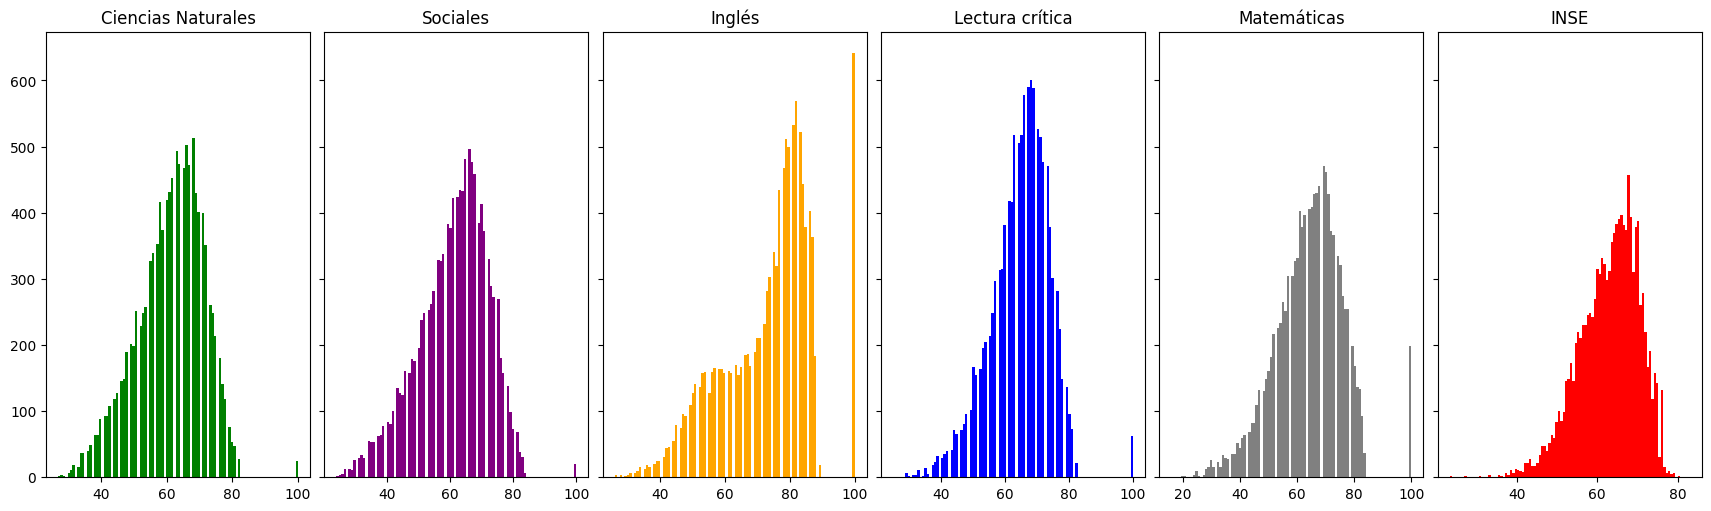

In [109]:
fig, axs = plt.subplots(1, 6, layout='constrained', sharey=True)
plt.rcParams["figure.figsize"] = [17, 5]
ax = axs[0]
ax.hist(PUNT_C_NATURALES, color = "green", bins= 100)
ax.set_title('Ciencias Naturales')

ax = axs[1]
ax.hist(PUNT_SOCIALES_CIUDADANAS, color = "purple", bins= 100)
ax.set_title('Sociales')

ax = axs[2]
ax.hist(PUNT_INGLES, color = "orange", bins= 100)
ax.set_title('Inglés')

ax = axs[3]
ax.hist(PUNT_LECTURA_CRITICA, color = "blue", bins= 100)
ax.set_title('Lectura crítica')

ax = axs[4]
ax.hist(PUNT_MATEMATICAS, color = "grey", bins= 100)
ax.set_title('Matemáticas')

ax = axs[5]
ax.hist(INSE, color = "red", bins= 100)
ax.set_title('INSE')
plt.show()

El puntaje para cada una de las áreas evaluadas es un valor entre 0 y 100, por lo que no se tienen valores no representativos. Por otro lado, el Índice socioeconómico también considera una escala de 0 a 100; a partir de los histogramas determinamos entonces que ninguna de las variables presenta datos no representativos.

Adicionalmente, se realiza una prueba de hipótesis para normalidad utilizando el test de Shapiro Wilk:

In [110]:
'''Prueba Shapiro Wilk'''
#Para la variable respuesta 'Índice socioeconómico del evaluado'
stat_res, p_res = shapiro(tabla_regresion['ESTU_INSE_INDIVIDUAL'])
print('Índice Socioeconómico: ','stat=%.3f, p=%.3f' % (stat_res, p_res))

#Variable Puntaje Ciencias Naturales
stat_nat, p_nat = shapiro(tabla_regresion['PUNT_C_NATURALES'])
print('Puntaje Ciencias Naturales: ', 'stat=%.3f, p=%.3f' % (stat_nat, p_nat))

#Variable Puntaje Matemáticas
stat_mat, p_mat = shapiro(tabla_regresion['PUNT_MATEMATICAS'])
print('Puntaje Matemáticas: ','stat=%.3f, p=%.3f' % (stat_mat, p_mat))

#Variable Puntaje Inglés
stat_ing, p_ing = shapiro(tabla_regresion['PUNT_INGLES'])
print('Puntaje Inglés: ', 'stat=%.3f, p=%.3f' % (stat_ing, p_ing))

#Variable Puntaje Sociales y Ciudadanas
stat_soc, p_soc = shapiro(tabla_regresion['PUNT_SOCIALES_CIUDADANAS'])
print('Puntaje Sociales y Ciudadanas: ','stat=%.3f, p=%.3f' % (stat_soc, p_soc))

#Variable Puntaje Lectura Crítica
stat_lec, p_lec = shapiro(tabla_regresion['PUNT_LECTURA_CRITICA'])
print('Puntaje Lectura Crítica: ', 'stat=%.3f, p=%.3f' % (stat_lec, p_lec))

Índice Socioeconómico:  stat=0.974, p=0.000
Puntaje Ciencias Naturales:  stat=0.981, p=0.000
Puntaje Matemáticas:  stat=0.980, p=0.000
Puntaje Inglés:  stat=0.957, p=0.000
Puntaje Sociales y Ciudadanas:  stat=0.978, p=0.000
Puntaje Lectura Crítica:  stat=0.971, p=0.000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11853.
  res = hypotest_fun_out(*samples, **kwds)


Como $p< 0.05$ en cada caso, entonces se rechaza con una confianza del 95% que las variables 'Índice socioeconómico del evaluado', 'Puntaje Ciencias Naturales', 'Puntaje Matemáticas', 'Puntaje Inglés', 'Puntaje Sociales y Ciudadanas', y 'Puntaje Lectura Crítica' presentan distribución normal.

## Diagramas de dispersión respecto a cada variable
A partir de los diagramas de dispersión entre la variable 'Índice socioeconómico del evaluado' y cada una de las variables correspondientes a los puntajes en cada área, se busca determinar descriptivamente cuáles de las variables escogidas se pueden considerar explicativas o no.

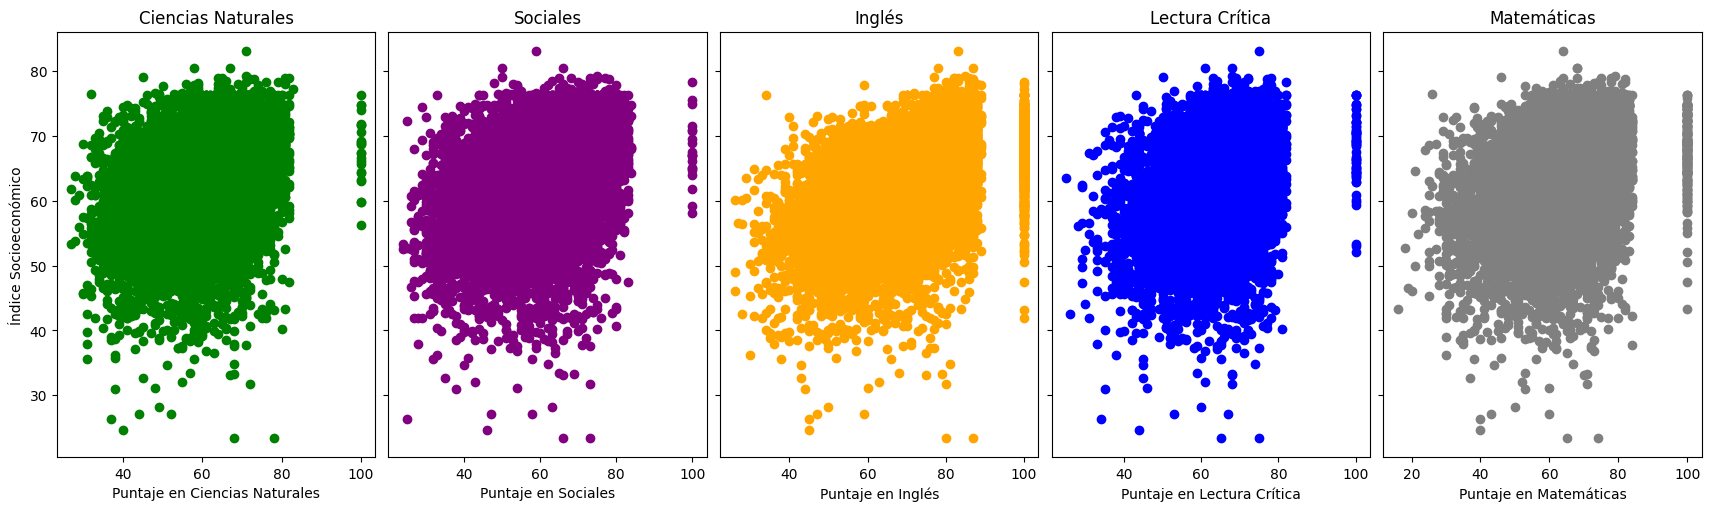

In [111]:
fig, axs = plt.subplots(1, 5, layout='constrained', sharey=True)
plt.rcParams["figure.figsize"] = [20, 5]  # Ajustar el tamaño de la figura

# Primer diagrama de dispersión
ax = axs[0]
ax.scatter(tabla_regresion['PUNT_C_NATURALES'], tabla_regresion['ESTU_INSE_INDIVIDUAL'], color='green')
ax.set_title('Ciencias Naturales')
ax.set_xlabel('Puntaje en Ciencias Naturales')
ax.set_ylabel('Índice Socioeconómico')

# Segundo diagrama de dispersión
ax = axs[1]
ax.scatter(tabla_regresion['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion['ESTU_INSE_INDIVIDUAL'], color='purple')
ax.set_title('Sociales')
ax.set_xlabel('Puntaje en Sociales')

# Tercer diagrama de dispersión
ax = axs[2]
ax.scatter(tabla_regresion['PUNT_INGLES'], tabla_regresion['ESTU_INSE_INDIVIDUAL'], color='orange')
ax.set_title('Inglés')
ax.set_xlabel('Puntaje en Inglés')

# Cuarto diagrama de dispersión
ax = axs[3]
ax.scatter(tabla_regresion['PUNT_LECTURA_CRITICA'], tabla_regresion['ESTU_INSE_INDIVIDUAL'], color='blue')
ax.set_title('Lectura Crítica')
ax.set_xlabel('Puntaje en Lectura Crítica')

# Quinto diagrama de dispersión
ax = axs[4]
ax.scatter(tabla_regresion['PUNT_MATEMATICAS'], tabla_regresion['ESTU_INSE_INDIVIDUAL'], color='grey')
ax.set_title('Matemáticas')
ax.set_xlabel('Puntaje en Matemáticas')

# Mostrar la figura
plt.show()

A partir de los diagramas de dispersión, se observan nubes de puntos sin un patrón particular entre los puntajes obtenidos en cada una de las áreas evaluadas y el índice socioeconómico del evaluado, por lo que se determina que el índice socioeconómico no depende del puntaje en ciencias naturales, ni del puntaje en sociales y ciudadanas, ni del puntaje en inglés, ni del puntaje en lectura crítica, ni del puntaje en matemáticas.

## Modelos de regresión lineal simple para cada una de las variables explicativas

Se realiza un modelo de regresión lineal simple entre el índice socioeconómico y cada una de las variables correspondientes en cada área, y se calculan los respectivos coeficientes de determinación:

In [112]:
## Modelo de regresión lineal para ciencias naturales
x0 = np.array(tabla_regresion['PUNT_C_NATURALES']).reshape(-1,1)
y0 = tabla_regresion["ESTU_INSE_INDIVIDUAL"]
trainx0, testx0, trainy0, testy0 = train_test_split(x0, y0, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx0, trainy0)
pred_lineal0 = regresion0.predict(testx0)
score_ciencias = regresion0.score(testx0, testy0)

## Modelo de regresión lineal para Inglés
x1 = np.array(tabla_regresion['PUNT_INGLES']).reshape(-1,1)
y1 = tabla_regresion["ESTU_INSE_INDIVIDUAL"]
trainx1, testx1, trainy1, testy1 = train_test_split(x1, y1, test_size = 0.2, random_state = 0)
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal0.fit(trainx1, trainy1)
pred_lineal1 = regresion1.predict(testx1)
score_ingles = regresion1.score(testx1, testy1)

## Modelo de regresión lineal para Matematicas
x2 = np.array(tabla_regresion['PUNT_MATEMATICAS']).reshape(-1,1)
y2 = tabla_regresion["ESTU_INSE_INDIVIDUAL"]
trainx2, testx2, trainy2, testy2 = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(trainx2, trainy2)
pred_lineal2 = regresion2.predict(testx2)
score_matematicas = regresion2.score(testx2, testy2)

## Modelo de regresión lineal para Sociales
x3 = np.array(tabla_regresion['PUNT_SOCIALES_CIUDADANAS']).reshape(-1,1)
y3 = tabla_regresion["ESTU_INSE_INDIVIDUAL"]
trainx3, testx3, trainy3, testy3 = train_test_split(x3, y3, test_size = 0.2, random_state = 0)
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(trainx3, trainy3)
pred_lineal3 = regresion3.predict(testx3)
score_sociales = regresion3.score(testx3, testy3)

## Modelo de regresión lineal para Lectura critica
x4 = np.array(tabla_regresion['PUNT_LECTURA_CRITICA']).reshape(-1,1)
y4 = tabla_regresion["ESTU_INSE_INDIVIDUAL"]
trainx4, testx4, trainy4, testy4 = train_test_split(x4, y4, test_size = 0.2, random_state = 0)
modelo_lineal4 = LinearRegression()
regresion4 = modelo_lineal4.fit(trainx4, trainy4)
pred_lineal4 = regresion4.predict(testx4)
score_lectura = regresion4.score(testx4, testy4)

Se grafica la recta de regresión junto con el diagrama de dispersión para cada una de las variables:

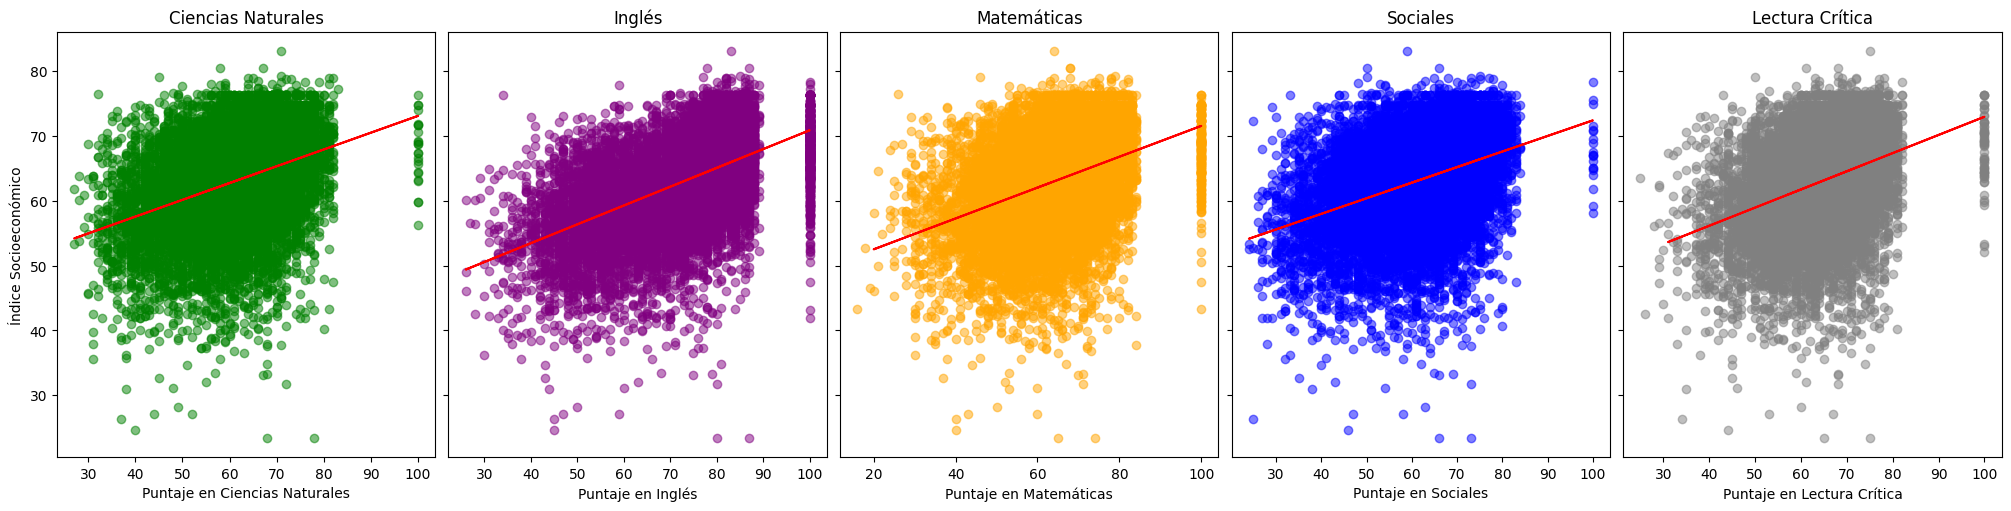

In [113]:
# Crear la figura con 5 subgráficas, compartiendo el eje Y
fig, axs = plt.subplots(1, 5, layout='constrained', sharey=True)
plt.rcParams["figure.figsize"] = [20, 5]  # Ajustar el tamaño de la figura

# Primer diagrama de dispersión
ax = axs[0]
ax.scatter(x0, y0, color='green', alpha=0.5)
ax.plot(testx0, pred_lineal0, color='red')  # Recta de regresión
ax.set_title('Ciencias Naturales')
ax.set_xlabel('Puntaje en Ciencias Naturales')
ax.set_ylabel('Índice Socioeconómico')

# Segundo diagrama de dispersión
ax = axs[1]
ax.scatter(x1, y1, color='purple', alpha=0.5)
ax.plot(testx1, pred_lineal1, color='red')  # Recta de regresión
ax.set_title('Inglés')
ax.set_xlabel('Puntaje en Inglés')

# Tercer diagrama de dispersión
ax = axs[2]
ax.scatter(x2, y2, color='orange', alpha=0.5)
ax.plot(testx2, pred_lineal2, color='red')  # Recta de regresión
ax.set_title('Matemáticas')
ax.set_xlabel('Puntaje en Matemáticas')

# Cuarto diagrama de dispersión
ax = axs[3]
ax.scatter(x3, y3, color='blue', alpha=0.5)
ax.plot(testx3, pred_lineal3, color='red')  # Recta de regresión
ax.set_title('Sociales')
ax.set_xlabel('Puntaje en Sociales')

# Quinto diagrama de dispersión
ax = axs[4]
ax.scatter(x4, y4, color='grey', alpha=0.5)
ax.plot(testx4, pred_lineal4, color='red')  # Recta de regresión
ax.set_title('Lectura Crítica')
ax.set_xlabel('Puntaje en Lectura Crítica')

# Mostrar la figura
plt.show()

In [114]:
print(f'Coeficiente de determinación modelo de regresión con la variable Puntaje en Ciencias Naturales como variable explicativa: ', score_ciencias)
print(f'Coeficiente de determinación modelo de regresión con la variable Puntaje en Inglés como variable explicativa: ', score_ingles)
print(f'Coeficiente de determinación modelo de regresión con la variable Puntaje en Matemáticas como variable explicativa: ' , score_matematicas)
print(f'Coeficiente de determinación modelo de regresión con la variable Puntaje en Sociales como variable explicativa: ', score_sociales)
print(f'Coeficiente de determinación modelo de regresión con la variable Puntaje en Lectura Crítica como variable explicativa: ', score_lectura)

Coeficiente de determinación modelo de regresión con la variable Puntaje en Ciencias Naturales como variable explicativa:  0.1326708103044516
Coeficiente de determinación modelo de regresión con la variable Puntaje en Inglés como variable explicativa:  0.2982987282607831
Coeficiente de determinación modelo de regresión con la variable Puntaje en Matemáticas como variable explicativa:  0.1299928456360936
Coeficiente de determinación modelo de regresión con la variable Puntaje en Sociales como variable explicativa:  0.124521335113143
Coeficiente de determinación modelo de regresión con la variable Puntaje en Lectura Crítica como variable explicativa:  0.13334295954136466


A partir del coeficiente de correlación respecto a cada uno de los modelos de regresión lineal implementados, se observa un mejor ajuste con respecto a la variable Puntaje en Inglés, sin embargo, en cada modelo el coeficiente de determinación es menor al 30%, lo que se puede interpretar como una baja o nula dependencia entre las variables correspondientes al puntaje en cada área y el índice socioeconómico.

## **Modelos de regresión lineal múltiple y determinación de variables explicativas**

En esta sección se pretende realizar múltiples modelos de regresión lineal múltiple para la variable respuesta 'Índice socioeconómico del evaluado' y realizar comparaciones basadas en el coeficiente de determinación para concluir cuáles de las variables implementadas en el análisis se pueden considerar como explicativas.

**Modelo de regresión múltiple considerando todos los datos**

In [132]:
X = tabla_regresion.drop(['ESTU_INSE_INDIVIDUAL'], axis = 1)
Y = tabla_regresion['ESTU_INSE_INDIVIDUAL']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)

modelo_lineal = LinearRegression()
regresion_lineal = modelo_lineal.fit(trainX, trainY)
pred_lineal = regresion_lineal.predict(testX)

r2_lineal = regresion_lineal.score(testX, testY)
print('Coeficiente de determinación: ', r2_lineal)

Coeficiente de determinación:  0.29596743300709427


**Modelo de regresión múltiple sin puntaje de Ciencias Naturales**

In [133]:
#Sin Puntaje de Ciencias Naturales
X1 = X[['PUNT_INGLES',  'PUNT_MATEMATICAS','PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS' ]]
Y1 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
trainX1, testX1, trainY1, testY1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)

modelo_lineal1 = LinearRegression()
regresion_lineal1 = modelo_lineal1.fit(trainX1, trainY1)
pred_lineal1 = regresion_lineal1.predict(testX1)

r2_lineal1 = regresion_lineal1.score(testX1, testY1)
print('Coeficiente de determinación: ',r2_lineal1)

Coeficiente de determinación:  0.2963213062315091


**Modelo de regresión múltiple sin puntaje de Matemáticas**

In [134]:
#Sin puntaje de Matemáticas
X2 = X[[ 'PUNT_C_NATURALES','PUNT_INGLES',  'PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS' ]]
Y2 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
trainX2, testX2, trainY2, testY2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)

modelo_lineal2 = LinearRegression()
regresion_lineal2 = modelo_lineal2.fit(trainX2, trainY2)
pred_lineal2 = regresion_lineal2.predict(testX2)

r2_lineal2 = regresion_lineal2.score(testX2, testY2)
print('Coeficiente de determinación: ', r2_lineal2)

Coeficiente de determinación:  0.29820466620387853


**Modelo de regresión múltiple sin puntaje de Inglés**

In [135]:
#Sin puntaje de Ingles
X3 = X[[ 'PUNT_C_NATURALES',  'PUNT_MATEMATICAS','PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS' ]]
Y3 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
trainX3, testX3, trainY3, testY3 = train_test_split(X3, Y3, test_size = 0.2, random_state = 0)

modelo_lineal3 = LinearRegression()
regresion_lineal3 = modelo_lineal3.fit(trainX3, trainY3)
pred_lineal3 = regresion_lineal3.predict(testX3)

r2_lineal3 = regresion_lineal3.score(testX3, testY3)
print('Coeficiente de determinación: ', r2_lineal3)

Coeficiente de determinación:  0.15959321751307154


**Modelo de regresión múltiple sin puntaje de Sociales y Ciudadanas**

In [137]:
#Sin puntaje de Sociales y Ciudadanas
X4 = X[[ 'PUNT_C_NATURALES','PUNT_INGLES', 'PUNT_MATEMATICAS','PUNT_LECTURA_CRITICA' ]]
Y4 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
trainX4, testX4, trainY4, testY4 = train_test_split(X4, Y4, test_size = 0.2, random_state = 0)

modelo_lineal4 = LinearRegression()
regresion_lineal4 = modelo_lineal4.fit(trainX4, trainY4)
pred_lineal4 = regresion_lineal4.predict(testX4)

r2_lineal4 = regresion_lineal4.score(testX4, testY4)
print('Coeficiente de determinación: ', r2_lineal4)

Coeficiente de determinación:  0.29603318491147834


**Modelo de regresión múltiple sin puntaje de Lectura Crítica**

In [138]:
#Sin puntaje de Lectura Critica
X5 = X[[ 'PUNT_C_NATURALES','PUNT_INGLES',  'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS' ]]
Y5 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
trainX5, testX5, trainY5, testY5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 0)

modelo_lineal5 = LinearRegression()
regresion_lineal5 = modelo_lineal5.fit(trainX5, trainY5)
pred_lineal5 = regresion_lineal5.predict(testX5)

r2_lineal5 = regresion_lineal5.score(testX5, testY5)
print('Coeficiente de determinación: ', r2_lineal5)

Coeficiente de determinación:  0.2964820089952951


Puesto que el modelo sin la variable 'Puntaje de Inglés' se ve afectado negativamente (es decir, el coeficiente de determinación de este modelo es menor al coeficiente de determinación del modelo utilizando todas las variables), entonces se concluye que la variable 'Puntaje de Inglés' es una variable explicativa.

## **Diagrama de dispersión a partir de las dos variables más explicativas**
Si bien determinamos que la única variable explicativa es 'Puntaje de Inglés', se realiza el diagrama de dispersión junto con la variable cuya ausencia contribuyó en menor medida al coeficiente de determinación, es decir, 'Puntaje de Sociales y Ciudadanas'. Además, calculamos el coeficiente de determinación del modelo de regresión múltiple considerando únicamente estas dos variables como variables explicativas y la variable 'Índice socioeconómico' como variable respuesta.

In [139]:
XY, Z = X[['PUNT_INGLES', 'PUNT_SOCIALES_CIUDADANAS']], tabla_regresion['ESTU_INSE_INDIVIDUAL']
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size = 0.2, random_state = 0)

modelo1 = LinearRegression()
modelo1.fit(trainXY, trainZ) # Entrenamos el modelo

LinearRegression()

In [140]:
#Coeficiente de determinación
modelo1.score(testXY, testZ)

0.29831063224309917

In [141]:
#Plano de regresión
array = modelo1.coef_
array

array([0.28397272, 0.01299215])

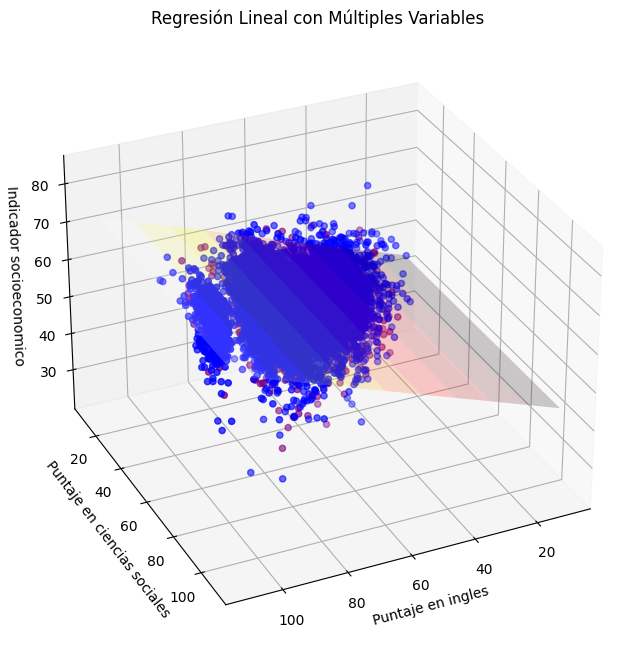

In [142]:
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(10, 110, num=10), np.linspace(10, 110, num=10))
plano_reg = array[0]*xx + array[1]**yy +modelo1.intercept_

ax.plot_surface(xx, yy, plano_reg, alpha=0.2, cmap='hot')
ax.scatter(trainXY["PUNT_INGLES"], trainXY['PUNT_SOCIALES_CIUDADANAS'], trainZ, c='blue',s=20)
ax.scatter(testXY["PUNT_INGLES"], testXY['PUNT_SOCIALES_CIUDADANAS'], testZ, c='purple',s=20)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Puntaje en ingles')
ax.set_ylabel('Puntaje en ciencias sociales')
ax.set_zlabel('Indicador socioeconomico')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

## **Modelo de red neuronal de perceptrón multicapa**

Ahora, implementamos un modelo de red neuronal de perceptrón multicapa de 6 capas con 100 nodos tomando como variable respuesta 'Índice socioeconómico del evaluado' y variables explicativas 'Puntaje en Lectura crítica', 'Puntaje en Matemáticas', 'Puntaje en Ciencias Naturales', 'Puntaje en Sociales y Ciudadanas' y 'Puntaje en Inglés'.


In [151]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100),
                       max_iter = 500, activation = 'relu',
                       solver = 'adam', learning_rate = 'invscaling')
mlp_reg.fit(trainX, trainY) #mismos datos de entrenamiento que se utilizaron en el modelo de regresión lineal múltiple

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100),
             learning_rate='invscaling', max_iter=500)

In [152]:
print('Coeficiente de determinación: ', mlp_reg.score(testX, testY))

Coeficiente de determinación:  0.30514449407866284


Notemos que se obtiene un mejor coeficiente de determinación en el modelo de red neuronal de perceptrón multicapa en comparación con el coeficiente de determinación del modelo de regresión lineal múltiple.

Utilicemos los modelos obtenidos para estimar el nivel socioeconómico de un evaluado cuyos puntajes en Ciencias naturales, Inglés, Matemáticas, Lectura Crítica y Sociales y Ciudadanas son respectivamente: 77,87,83,100,77.

In [153]:
no_obs = np.array([[77, 87, 83, 100, 77]])
print('Se espera que el indicador socioeconómico sea', mlp_reg.predict(no_obs), 'bajo el modelo de red neuronal de perceptrón multicapa y ',
      modelo_lineal.predict(no_obs), "bajo el modelo de regresión lineal múltiple.")

Se espera que el indicador socioeconómico sea [67.30946461] bajo el modelo de red neuronal de perceptrón multicapa y  [66.62706048] bajo el modelo de regresión lineal múltiple.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Imputación de valores**

Se realiza la imputación de valores basándonos en los valores estimados para la variable 'Índice socioeconómico del evaluado' según el modelo con mayor ajuste, es decir, el modelo de red neuronal de perceptrón multicapa.

Obtenemos los datos para los cuales contamos con valores para cada uno de los puntajes pero no para el índice socioeconómico:

In [154]:
icfes_con_nan = datos_icfes[(datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
 (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
 (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
 (~datos_icfes['PUNT_C_NATURALES'].isna()) &
 (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
 (~datos_icfes['PUNT_INGLES'].isna())]

icfes_con_nan.info()
icfes_con_nan.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 35 to 12701
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             849 non-null    object 
 1   ESTU_NACIONALIDAD              849 non-null    object 
 2   ESTU_GENERO                    849 non-null    object 
 3   ESTU_FECHANACIMIENTO           849 non-null    object 
 4   PERIODO                        849 non-null    int64  
 5   ESTU_CONSECUTIVO               849 non-null    object 
 6   ESTU_ESTUDIANTE                849 non-null    object 
 7   ESTU_PAIS_RESIDE               849 non-null    object 
 8   ESTU_DEPTO_RESIDE              849 non-null    object 
 9   ESTU_COD_RESIDE_DEPTO          849 non-null    int64  
 10  ESTU_MCPIO_RESIDE              849 non-null    object 
 11  ESTU_COD_RESIDE_MCPIO          849 non-null    int64  
 12  ESTU_PRESENTACIONSABADO        849 non-null    objec

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
35,TI,COLOMBIA,F,25/10/2005,20231,SB11202310012523,ESTUDIANTE,COLOMBIA,VALLE,76,...,52.0,33.0,A1,293,53.0,NaN,NaN,2,NaN,PUBLICAR
63,TI,COLOMBIA,M,03/05/2006,20231,SB11202310004061,ESTUDIANTE,COLOMBIA,VALLE,76,...,57.0,42.0,A1,318,66.0,NaN,NaN,3,NaN,PUBLICAR
84,TI,COLOMBIA,F,24/09/2003,20231,SB11202310038767,ESTUDIANTE,COLOMBIA,VALLE,76,...,46.0,23.0,A-,218,20.0,NaN,NaN,3,NaN,PUBLICAR
183,TI,COLOMBIA,M,22/12/2005,20231,SB11202310005059,ESTUDIANTE,COLOMBIA,VALLE,76,...,55.0,39.0,A1,280,46.0,NaN,NaN,3,NaN,PUBLICAR
201,TI,COLOMBIA,M,11/11/2005,20231,SB11202310028363,ESTUDIANTE,COLOMBIA,CAUCA,19,...,50.0,29.0,A1,259,37.0,NaN,NaN,4,NaN,PUBLICAR
205,TI,COLOMBIA,M,15/06/2006,20231,SB11202310023945,ESTUDIANTE,COLOMBIA,CAUCA,19,...,57.0,42.0,A1,267,40.0,NaN,NaN,4,NaN,PUBLICAR
221,TI,COLOMBIA,M,06/09/2006,20231,SB11202310016430,ESTUDIANTE,COLOMBIA,VALLE,76,...,68.0,55.0,B1,263,39.0,NaN,NaN,3,NaN,PUBLICAR
232,TI,COLOMBIA,M,17/11/2005,20231,SB11202310079838,ESTUDIANTE,COLOMBIA,VALLE,76,...,57.0,41.0,A1,227,24.0,NaN,NaN,2,NaN,PUBLICAR
257,TI,COLOMBIA,M,29/11/2005,20231,SB11202310000027,ESTUDIANTE,COLOMBIA,CAUCA,19,...,78.0,71.0,B1,385,97.0,NaN,NaN,4,NaN,PUBLICAR
258,TI,COLOMBIA,M,17/09/2006,20231,SB11202310000067,ESTUDIANTE,COLOMBIA,CAUCA,19,...,85.0,92.0,B+,375,95.0,NaN,NaN,4,NaN,PUBLICAR


Generamos la tabla de regresión:

In [155]:
tabla_regresion2 = icfes_con_nan[['ESTU_INSE_INDIVIDUAL', 'PUNT_C_NATURALES','PUNT_INGLES',  'PUNT_MATEMATICAS','PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS' ]]
tabla_regresion2.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_C_NATURALES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA,PUNT_SOCIALES_CIUDADANAS
35,NaN,56,52.0,52,67,62
63,NaN,70,57.0,62,63,62
84,NaN,46,46.0,36,44,48
183,NaN,46,55.0,65,54,59


Obtenemos los datos de las variables explicativas con los cuales queremos estimar el valor del índice socioeconómico:

In [156]:
X_no = tabla_regresion2.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
X_no.head(4)

,PUNT_C_NATURALES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA,PUNT_SOCIALES_CIUDADANAS
35,56,52.0,52,67,62
63,70,57.0,62,63,62
84,46,46.0,36,44,48
183,46,55.0,65,54,59


Estimamos los valores:

In [157]:
tabla_regresion2["ESTU_INSE_INDIVIDUAL"] = mlp_reg.predict(X_no)
tabla_regresion2.head()

<ipython-input-157-9c01864a626b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_regresion2["ESTU_INSE_INDIVIDUAL"] = mlp_reg.predict(X_no)


,ESTU_INSE_INDIVIDUAL,PUNT_C_NATURALES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA,PUNT_SOCIALES_CIUDADANAS
35,57.039305,56,52.0,52,67,62
63,57.873386,70,57.0,62,63,62
84,53.985110,46,46.0,36,44,48
183,56.859956,46,55.0,65,54,59
201,54.211913,44,50.0,40,57,67


Hacemos la imputación de los valores, es decir, ingresamos en la tabla los valores estimados para el índice socioeconómico:

In [158]:
icfes_con_nan[['ESTU_INSE_INDIVIDUAL', 'PUNT_C_NATURALES','PUNT_INGLES',  'PUNT_MATEMATICAS','PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS' ]] = tabla_regresion2
icfes_con_nan.head(10) #Datos imputados

<ipython-input-158-41ca92bad0a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icfes_con_nan[['ESTU_INSE_INDIVIDUAL', 'PUNT_C_NATURALES','PUNT_INGLES',  'PUNT_MATEMATICAS','PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS' ]] = tabla_regresion2


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
35,TI,COLOMBIA,F,25/10/2005,20231,SB11202310012523,ESTUDIANTE,COLOMBIA,VALLE,76,...,52.0,33.0,A1,293,53.0,57.039305,NaN,2,NaN,PUBLICAR
63,TI,COLOMBIA,M,03/05/2006,20231,SB11202310004061,ESTUDIANTE,COLOMBIA,VALLE,76,...,57.0,42.0,A1,318,66.0,57.873386,NaN,3,NaN,PUBLICAR
84,TI,COLOMBIA,F,24/09/2003,20231,SB11202310038767,ESTUDIANTE,COLOMBIA,VALLE,76,...,46.0,23.0,A-,218,20.0,53.985110,NaN,3,NaN,PUBLICAR
183,TI,COLOMBIA,M,22/12/2005,20231,SB11202310005059,ESTUDIANTE,COLOMBIA,VALLE,76,...,55.0,39.0,A1,280,46.0,56.859956,NaN,3,NaN,PUBLICAR
201,TI,COLOMBIA,M,11/11/2005,20231,SB11202310028363,ESTUDIANTE,COLOMBIA,CAUCA,19,...,50.0,29.0,A1,259,37.0,54.211913,NaN,4,NaN,PUBLICAR
205,TI,COLOMBIA,M,15/06/2006,20231,SB11202310023945,ESTUDIANTE,COLOMBIA,CAUCA,19,...,57.0,42.0,A1,267,40.0,58.348559,NaN,4,NaN,PUBLICAR
221,TI,COLOMBIA,M,06/09/2006,20231,SB11202310016430,ESTUDIANTE,COLOMBIA,VALLE,76,...,68.0,55.0,B1,263,39.0,62.868616,NaN,3,NaN,PUBLICAR
232,TI,COLOMBIA,M,17/11/2005,20231,SB11202310079838,ESTUDIANTE,COLOMBIA,VALLE,76,...,57.0,41.0,A1,227,24.0,57.193980,NaN,2,NaN,PUBLICAR
257,TI,COLOMBIA,M,29/11/2005,20231,SB11202310000027,ESTUDIANTE,COLOMBIA,CAUCA,19,...,78.0,71.0,B1,385,97.0,64.536263,NaN,4,NaN,PUBLICAR
258,TI,COLOMBIA,M,17/09/2006,20231,SB11202310000067,ESTUDIANTE,COLOMBIA,CAUCA,19,...,85.0,92.0,B+,375,95.0,67.526553,NaN,4,NaN,PUBLICAR


# **Discusión de resultados**

Después de analizar las variables 'Índice socioeconómico del evaluado', 'Puntaje de Ciencias Naturales', 'Puntaje de Inglés, 'Puntaje de matemáticas', 'Puntaje de Lectura crítica' y 'Puntaje Sociales y Ciudadanas' se notan y discuten diversos factores.

En primer lugar, se consideraron como representativos todos los datos entre 0 y 100 para las 6 variables mencionadas, esto pues se trata de puntajes de una prueba. Ahora, al realizar los modelos de regresión lineal entre cada uno de los puntajes y el índice socioeconómico, se obtuvo un coeficiente de determinación $R^2$ menor al $14\%$ para todos los puntajes a excepción de Inglés, con el que se obtuvo $R^2 \approx 30\%$. Es decir, bajo el modelo de regresión lineal simple, el coeficiente de determinación sugiere una relación casi nula o bien no lineal entre el índice socioeconómico y los puntajes exceptuando Inglés.

Al implementar un método de regresión lineal múltiple fijando la variable
respuesta 'Índice socioeconómico del evaluado' y realizar comparaciones en ausencia de una de las variables, se observó un coeficiente de determinación menor al no incluir la variable 'Puntaje de Inglés', por lo cual se consideró como explicativa. Al realizar este mismo procedimiento con las demás variables, obtuvimos un valor $R^2$ aproximadamente igual o mayor, lo que podría indicar que la presencia de estas variables puede estar afectando negativamente al modelo.

Finalmente, se realizó un modelo de red neuronal de perceptrón multicapa utilizando los mismos datos de entrenamiento del modelo de regresión lineal múltiple. Si bien bajo este modelo obtenemos un mayor valor $R^2$ en comparación con el modelo de regresión lineal múltiple, sigue siendo un modelo sin buen ajuste para realizar predicciones; sin embargo, la consistencia del coeficiente de determinación podría indicar, razonablemente, la existencia de una relación entre las variables.

A partir de la comparación de los modelos, se plantea una posible correlación entre las variables 'Puntaje de Inglés' e 'Índice socioeconómico del evaluado', para la cual se realiza una prueba de Correlación de Pearson para las hipótesis

$H_0: \text{Las variables 'Puntaje de [asignatura]' e 'Índice socioeconómico' no están correlacionadas}$

$H_a: \text{Las variables 'Puntaje de [asignatura]' e 'Índice socioeconómico' están correlacionadas}$

y se determinan los coeficientes de Pearson, Kendall y Spearman:

### Determinación de los Coeficientes de correlación

Se determinan los coeficientes de correlación de Kendall, Pearson y Spearman para las variables 'Índice socioeconómico del evaluado' y cada una de las variables asociadas a los puntajes por área.

In [159]:
#Puntaje Ciencias Naturales y nivel socio-economico
from scipy import stats
x00 = tabla_regresion['PUNT_C_NATURALES']
y00 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
kendall_corr, p_value_kendall = stats.kendalltau(x00, y00)
pearson_corr, p_value_pearson = stats.pearsonr(x00, y00)
spearman_corr, p_value_spearman = stats.spearmanr(x00, y00)
print("El coeficiente de correlación de Kendall asociado a las dos variables es de ", kendall_corr, "y el valor p = ",p_value_kendall)
print("El coeficiente de correlación de Pearson asociado a las dos variables es de ", pearson_corr, "y el valor p = ",p_value_pearson)
print("El coeficiente de correlación de Spearman asociado a las dos variables es de ",spearman_corr,"y el valor p = ",p_value_spearman)

El coeficiente de correlación de Kendall asociado a las dos variables es de  0.2505193571669217 y el valor p =  0.0
El coeficiente de correlación de Pearson asociado a las dos variables es de  0.3598554924882553 y el valor p =  0.0
El coeficiente de correlación de Spearman asociado a las dos variables es de  0.36474626881201705 y el valor p =  0.0


In [160]:
#Puntaje Matemáticas y nivel socio-economico
x11 = tabla_regresion['PUNT_MATEMATICAS']
y11 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
kendall_corr, p_value_kendall = stats.kendalltau(x11, y11)
pearson_corr, p_value_pearson = stats.pearsonr(x11, y11)
spearman_corr, p_value_spearman = stats.spearmanr(x11, y11)
print("El coeficiente de correlación de Kendall asociado a las dos variables es de ", kendall_corr, "y el valor p = ",p_value_kendall)
print("El coeficiente de correlación de Pearson asociado a las dos variables es de ", pearson_corr, "y el valor p = ",p_value_pearson)
print("El coeficiente de correlación de Spearman asociado a las dos variables es de ",spearman_corr,"y el valor p = ",p_value_spearman)

El coeficiente de correlación de Kendall asociado a las dos variables es de  0.2710503110002687 y el valor p =  0.0
El coeficiente de correlación de Pearson asociado a las dos variables es de  0.37666512872808033 y el valor p =  0.0
El coeficiente de correlación de Spearman asociado a las dos variables es de  0.39393544035017275 y el valor p =  0.0


In [161]:
#Puntaje Ingles y nivel socio-economico
x22 = tabla_regresion['PUNT_INGLES']
y22 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
kendall_corr, p_value_kendall = stats.kendalltau(x22, y22)
pearson_corr, p_value_pearson = stats.pearsonr(x22, y22)
spearman_corr, p_value_spearman = stats.spearmanr(x22, y22)
print("El coeficiente de correlación de Kendall asociado a las dos variables es de ", kendall_corr, "y el valor p = ",p_value_kendall)
print("El coeficiente de correlación de Pearson asociado a las dos variables es de ", pearson_corr, "y el valor p = ",p_value_pearson)
print("El coeficiente de correlación de Spearman asociado a las dos variables es de ",spearman_corr,"y el valor p = ",p_value_spearman)

El coeficiente de correlación de Kendall asociado a las dos variables es de  0.39578544802151444 y el valor p =  0.0
El coeficiente de correlación de Pearson asociado a las dos variables es de  0.5511549003261875 y el valor p =  0.0
El coeficiente de correlación de Spearman asociado a las dos variables es de  0.565737484040732 y el valor p =  0.0


In [162]:
#Puntaje Sociales y Ciudadanas y nivel socio-economico
x33 = tabla_regresion['PUNT_SOCIALES_CIUDADANAS']
y33 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
kendall_corr, p_value_kendall = stats.kendalltau(x33, y33)
pearson_corr, p_value_pearson = stats.pearsonr(x33, y33)
spearman_corr, p_value_spearman = stats.spearmanr(x33, y33)
print("El coeficiente de correlación de Kendall asociado a las dos variables es de ", kendall_corr, "y el valor p = ",p_value_kendall)
print("El coeficiente de correlación de Pearson asociado a las dos variables es de ", pearson_corr, "y el valor p = ",p_value_pearson)
print("El coeficiente de correlación de Spearman asociado a las dos variables es de ",spearman_corr,"y el valor p = ",p_value_spearman)

El coeficiente de correlación de Kendall asociado a las dos variables es de  0.24884271638677483 y el valor p =  0.0
El coeficiente de correlación de Pearson asociado a las dos variables es de  0.3572658294214809 y el valor p =  0.0
El coeficiente de correlación de Spearman asociado a las dos variables es de  0.36242984564624287 y el valor p =  0.0


In [163]:
#Puntaje Lectura Critica y nivel socio-economico
x44 = tabla_regresion['PUNT_LECTURA_CRITICA']
y44 = tabla_regresion['ESTU_INSE_INDIVIDUAL']
kendall_corr, p_value_kendall = stats.kendalltau(x44, y44)
pearson_corr, p_value_pearson = stats.pearsonr(x44, y44)
spearman_corr, p_value_spearman = stats.spearmanr(x44, y44)
print("El coeficiente de correlación de Kendall asociado a las dos variables es de ", kendall_corr, "y el valor p = ",p_value_kendall)
print("El coeficiente de correlación de Pearson asociado a las dos variables es de ", pearson_corr, "y el valor p = ",p_value_pearson)
print("El coeficiente de correlación de Spearman asociado a las dos variables es de ",spearman_corr,"y el valor p = ",p_value_spearman)

El coeficiente de correlación de Kendall asociado a las dos variables es de  0.24636724048204137 y el valor p =  0.0
El coeficiente de correlación de Pearson asociado a las dos variables es de  0.35477831154957706 y el valor p =  0.0
El coeficiente de correlación de Spearman asociado a las dos variables es de  0.3575861775493282 y el valor p =  0.0


Dado que $p\approx 0$ para cada una de las asignaturas, entonces se rechaza con una confianza del 95% que las variables 'Puntaje de [asignatura]' e 'Índice socioeconómico del evaluado' no estén correlacionadas o bien, no se rechaza con una confianza del 95% que las variables estén correlacionadas.

Ahora bien, para la variable 'Puntaje de Inglés', se obtuvo $0.4 < \rho, S < 0.6$ luego según Landis y Koch (1977) concluimos que las variables 'Índice socioeconómico del evaluado' y 'Puntaje de Inglés' están moderadamente correlacionadas. Para las variables 'Índice socioeconómico del evaluado' y las demás variables de puntaje por asignatura, se obtuvo $0.2 < \kappa, \rho, S < 0.4$, es decir, una correlación discreta.

Es de notar que este último análisis está en línea con lo observado mediante comparaciones de los modelos estadísticos implementados.

Ahora bien, podemos atribuir la correlación entre el índice socioeconómico y el puntaje de inglés a la posibilidad de acceso a educación en lenguas extranjeras en Colombia. Según Abadía et al. (2024) y el LEE de la Pontificia Universidad Javeriana (2023), en los años 2019 y el período 2014-2021, se observó que los estratos 4 y 5 son los que mayor puntaje registran en el componente de Inglés del ICFES, y esto mismo concuerda con la relación directamente proporcional entre la clase social de las familias y el nivel de educación que reciben los hijos.

# **Conclusiones**

A partir de las variables analizadas: Índice Socioeconómico del evaluado, Puntaje de Ciencias Naturales, Puntaje de Inglés, Puntaje de Matemáticas, Puntaje de Lectura Crítica y Puntaje Sociales y Ciudadanas, se determinó una correlación discreta entre cada uno de los puntajes y el Índice Socioeconómico, excepto en el caso del Puntaje de Inglés, que presentó una correlación moderada con el Índice Socioeconómico. Este grado de correlación está vinculado a la posibilidad que tienen los hogares en Colombia de acceder a educación de calidad y a formación bilingüe según su clase social o nivel socioeconómico. Los hogares con mayores recursos tienen más oportunidades de acceder a instituciones educativas con mejores programas y recursos.

Tras implementar modelos de regresión lineal y una red neuronal multicapa, se identificó que la variable Puntaje de Inglés es la más relevante como variable explicativa para la variable respuesta Índice Socioeconómico. Sin embargo, los modelos presentaron un ajuste inferior al 30%, lo que sugiere que no son adecuados para realizar predicciones precisas sobre datos no observados.

Finalmente, se determinó que un mayor puntaje en inglés suele estar relacionado con un mayor nivel socioeconómico. Esto se debe a que los evaluados con mayores recursos suelen tener acceso a colegios bilingües o pueden costear cursos extracurriculares de inglés. Además, en familias de nivel socioeconómico alto, invertir en el aprendizaje del inglés como segundo idioma es común, lo que refuerza esta correlación.

# **Bibliografía**


*   Virtanen, P., Gommers, R., Oliphant, T.E. et al. SciPy 1.0: fundamental algorithms for scientific computing in Python. Nat Methods 17, 261–272 (2020). [Link](https://doi.org/10.1038/s41592-019-0686-2)
*   Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [Link](https://www.jstor.org/stable/2529310)
* Victor, Abadía & Fabio, Cañavera & Chavez, Paula & Jose, Villadigo. (2024). Análisis del Impacto del Estrato Económico en los Resultados del ICFES.
* Laboratorio de Economía de la Educación (LEE) de la Pontificia
Universidad Javeriana. (2023). Informe No. 69. Inglés, el factor de
competitividad pendiente en Colombia. Disponible en
https://lee.javeriana.edu.co/publicaciones-y-documentos

